In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('TCS.NS.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-02-22,725.000,732.025024,721.150024,727.549988,589.708862,1310694.0
1,2013-02-25,726.500,737.500000,725.750000,736.849976,597.246765,1730030.0
2,2013-02-26,733.500,749.974976,733.000000,748.200012,606.446533,2853670.0
3,2013-02-27,747.625,751.525024,738.650024,741.599976,601.096863,2556682.0
4,2013-02-28,743.125,762.500000,742.625000,758.500000,614.794861,4599424.0


In [4]:
df=df.dropna()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-02-22,725.000000,732.025024,721.150024,727.549988,589.708862,1310694.0
1,2013-02-25,726.500000,737.500000,725.750000,736.849976,597.246765,1730030.0
2,2013-02-26,733.500000,749.974976,733.000000,748.200012,606.446533,2853670.0
3,2013-02-27,747.625000,751.525024,738.650024,741.599976,601.096863,2556682.0
4,2013-02-28,743.125000,762.500000,742.625000,758.500000,614.794861,4599424.0
...,...,...,...,...,...,...,...
2464,2023-02-16,3527.199951,3575.000000,3527.000000,3558.050049,3558.050049,1618931.0
2465,2023-02-17,3526.149902,3538.899902,3490.000000,3501.149902,3501.149902,1061369.0
2466,2023-02-20,3502.000000,3522.000000,3475.050049,3487.300049,3487.300049,1296082.0
2467,2023-02-21,3494.000000,3508.899902,3444.750000,3451.000000,3451.000000,1139541.0


In [5]:
df1=df.reset_index()['Close']

In [6]:
df1

0        727.549988
1        736.849976
2        748.200012
3        741.599976
4        758.500000
           ...     
2462    3558.050049
2463    3501.149902
2464    3487.300049
2465    3451.000000
2466    3401.550049
Name: Close, Length: 2467, dtype: float64

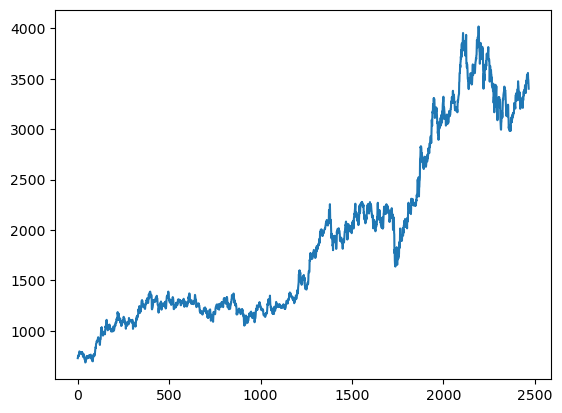

In [7]:
plt.plot(df1)

In [8]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
df1

array([[0.0128581 ],
       [0.01564714],
       [0.01905098],
       ...,
       [0.84049967],
       [0.82961338],
       [0.81478348]])

In [11]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
training_size,test_size

(1726, 741)

In [13]:
train_data

array([[0.0128581 ],
       [0.01564714],
       [0.01905098],
       ...,
       [0.42610157],
       [0.3945074 ],
       [0.39485229]])

In [14]:
test_data

array([[0.40531868],
       [0.41941385],
       [0.43196458],
       [0.42938544],
       [0.38617024],
       [0.38057715],
       [0.32544104],
       [0.33637232],
       [0.3034136 ],
       [0.29189754],
       [0.29081791],
       [0.28540475],
       [0.3337182 ],
       [0.29540632],
       [0.30543791],
       [0.31957807],
       [0.33176887],
       [0.34183044],
       [0.32803516],
       [0.34231026],
       [0.30711732],
       [0.29075791],
       [0.32704548],
       [0.30612765],
       [0.32433144],
       [0.32226214],
       [0.31503462],
       [0.30930659],
       [0.3363423 ],
       [0.34007604],
       [0.31578436],
       [0.32533608],
       [0.35794991],
       [0.34004606],
       [0.34545919],
       [0.3521919 ],
       [0.36616711],
       [0.39879591],
       [0.37360454],
       [0.37429432],
       [0.3655523 ],
       [0.36196855],
       [0.36249337],
       [0.37505907],
       [0.3793176 ],
       [0.37936259],
       [0.36517743],
       [0.362

In [15]:
len(train_data)

1726

In [16]:
len(test_data)

741

In [17]:

import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(1625, 100)
(1625,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)

(640, 100)
(640,)


(None, None)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
26/26 [==============================] - 30s 657ms/step - loss: 0.0095 - val_loss: 0.0117
Epoch 2/100
26/26 [==============================] - 10s 398ms/step - loss: 6.6050e-04 - val_loss: 0.0018
Epoch 3/100
26/26 [==============================] - 10s 390ms/step - loss: 3.4896e-04 - val_loss: 0.0016
Epoch 4/100
26/26 [==============================] - 8s 326ms/step - loss: 3.3547e-04 - val_loss: 0.0019
Epoch 5/100
26/26 [==============================] - 9s 366ms/step - loss: 3.3459e-04 - val_loss: 0.0021
Epoch 6/100
26/26 [==============================] - 9s 356ms/step - loss: 3.3691e-04 - val_loss: 0.0026
Epoch 7/100
26/26 [==============================] - 10s 393ms/step - loss: 3.2229e-04 - val_loss: 0.0023
Epoch 8/100
26/26 [==============================] - 10s 387ms/step - loss: 3.2025e-04 - val_loss: 0.0018
Epoch 9/100
26/26 [==============================] - 10s 389ms/step - loss: 3.0676e-04 - val_loss: 0.0023
Epoch 10/100
26/26 [==============================] -

In [28]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

20/20 [==============================] - 1s 69ms/step


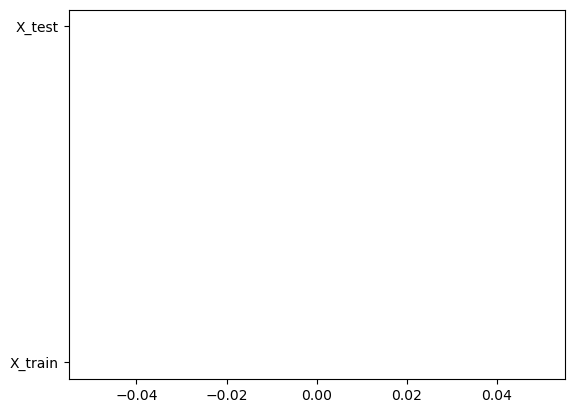

In [29]:
plt.plot('X_train')
plt.plot('X_test')
plt.show()

In [30]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [31]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1492.466911928285

In [32]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

3083.7459944985626

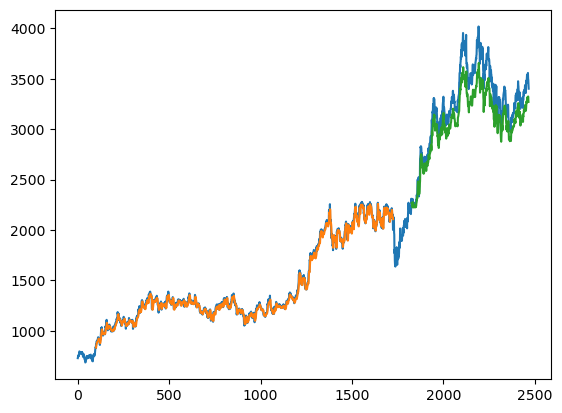

In [33]:
### Plotting 
# shift train predictions for plotting
### green line predicted data
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [34]:
len(test_data)

741

In [35]:
x_input=test_data[641:].reshape(1,-1)
x_input.shape

(1, 100)

In [36]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [37]:
temp_input

[0.695724250693823,
 0.6898462343627636,
 0.721695312175319,
 0.7249342176337633,
 0.7138230082363127,
 0.7299125420860791,
 0.7152175747332673,
 0.7245743555772332,
 0.7253391083691326,
 0.7240944905186353,
 0.727873225799293,
 0.7377548269058594,
 0.7309022178476644,
 0.741533562186517,
 0.7355655619726159,
 0.7428530808854062,
 0.7429730838874741,
 0.7415635078309065,
 0.7433179363843911,
 0.7522848360526008,
 0.7722430155910299,
 0.7668448643185685,
 0.7563634686261731,
 0.7595573454057781,
 0.7644456859752522,
 0.7591525281452455,
 0.7560335522140323,
 0.789112238317472,
 0.7949752450889185,
 0.7941055723294009,
 0.8009282357432064,
 0.7990238585432645,
 0.7973594138726214,
 0.779380585857363,
 0.7888123410245576,
 0.7868180534166106,
 0.8083656298276174,
 0.8112146541103054,
 0.8128941083405614,
 0.8135239220456165,
 0.811559580082059,
 0.8370058213009546,
 0.8260595701095745,
 0.822085930978457,
 0.8099251545306423,
 0.8085006423892982,
 0.7994887140422493,
 0.7821546358168223,


In [38]:
len(temp_input)

100

In [39]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.7541372]
101
1 day input [0.68984623 0.72169531 0.72493422 0.71382301 0.72991254 0.71521757
 0.72457436 0.72533911 0.72409449 0.72787323 0.73775483 0.73090222
 0.74153356 0.73556556 0.74285308 0.74297308 0.74156351 0.74331794
 0.75228484 0.77224302 0.76684486 0.75636347 0.75955735 0.76444569
 0.75915253 0.75603355 0.78911224 0.79497525 0.79410557 0.80092824
 0.79902386 0.79735941 0.77938059 0.78881234 0.78681805 0.80836563
 0.81121465 0.81289411 0.81352392 0.81155958 0.83700582 0.82605957
 0.82208593 0.80992515 0.80850064 0.79948871 0.78215464 0.78026527
 0.79395562 0.80392721 0.7858584  0.76641003 0.75495397 0.76751963
 0.77489714 0.77224302 0.76284128 0.7702037  0.77218305 0.77146333
 0.7749571  0.77134332 0.77276784 0.78773275 0.78872236 0.78765778
 0.75780299 0.79031183 0.78025026 0.79293593 0.79463039 0.80668625
 0.79454041 0.80784081 0.81131965 0.80625141 0.80325244 0.81878706
 0.82520491 0.82324056 0.8176325  0.82441013 0.80193285 0.81682279
 0.83243239 0.83900018 0.83229745 

In [40]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

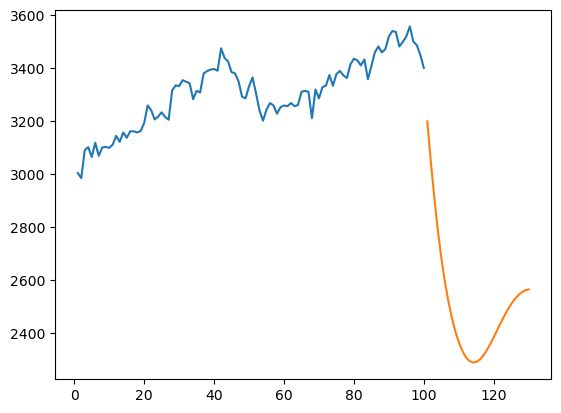

In [41]:
plt.plot(day_new,scaler.inverse_transform(df1[2367:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

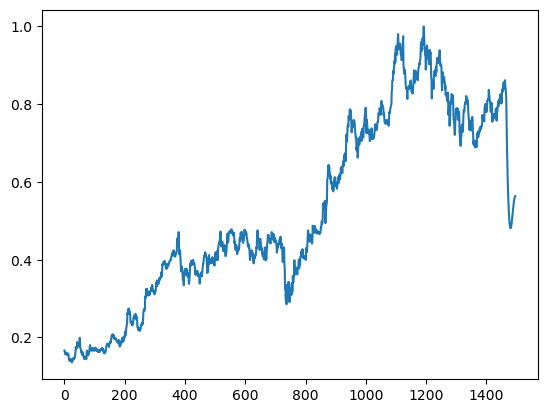

In [42]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

In [43]:
df3=scaler.inverse_transform(df3).tolist()

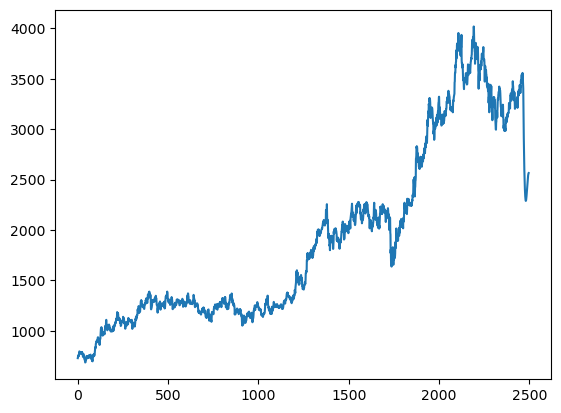

In [44]:
plt.plot(df3)

In [45]:
model.save("tcs_model2.h5")